In [0]:
import pandas as pd
import numpy as np

In [0]:
df_estudiantes = pd.read_csv("/dbfs/FileStore/shared_uploads/edgar.ramirezd@kof.com.mx/clean_students_complete.csv")
df_estudiantes.set_index("Student ID",inplace=True)
df_estudiantes =  df_estudiantes.drop(["Unnamed: 0"],axis=1)

Out[85]: [Text(0, 0, '0.49'),
 Text(0, 0, '0.49'),
 Text(0, 0, '0.51'),
 Text(0, 0, '0.52'),
 Text(0, 0, '0.51'),
 Text(0, 0, '0.49'),
 Text(0, 0, '0.52'),
 Text(0, 0, '0.53'),
 Text(0, 0, '0.50'),
 Text(0, 0, '0.45'),
 Text(0, 0, '0.49'),
 Text(0, 0, '0.51'),
 Text(0, 0, '0.48'),
 Text(0, 0, '0.46'),
 Text(0, 0, '0.47')]

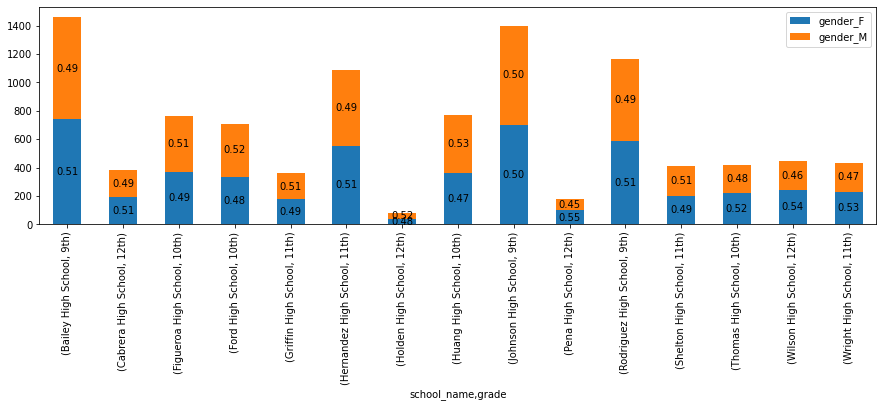

In [0]:
df_mejor_reading_escuela = df_estudiantes[["school_name","grade","reading_score"]]

#se obtiene el promedio de reading por escuela / grado
df_mejor_reading_escuela = df_mejor_reading_escuela.groupby(["school_name","grade"]).mean()

#se selecciona el grado con promedio mas alto por escuela
df_mejor_reading_escuela["max_reading_score"] = df_mejor_reading_escuela.groupby(["school_name"])['reading_score'].transform(max)
df_mejor_reading_escuela = df_mejor_reading_escuela[df_mejor_reading_escuela["reading_score"] == df_mejor_reading_escuela["max_reading_score"]]

#se une el resultado al data frame completo para obtener el detalle solo del grado con promedio más alto por escuela
df_final = pd.merge(df_estudiantes[["gender","school_name","grade"]],df_mejor_reading_escuela,how = "inner", on=["school_name","grade"])

df_dummies_genero = pd.get_dummies(df_final[["gender"]])
df_final = pd.concat([df_final[["gender","school_name","grade"]],df_dummies_genero],axis=1)

#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
ax = df_final.groupby(["school_name","grade"]).sum().plot.bar(stacked=True,figsize=(15,4))

#muestra la relacion por genero de cada grado con mayor puntaje por escuela
ax.bar_label(ax.containers[0],label_type='center',labels=['%.2f' % e for e in ax.containers[0].datavalues / (ax.containers[0].datavalues + ax.containers[1].datavalues)])
ax.bar_label(ax.containers[1],label_type='center',labels=['%.2f' % e for e in ax.containers[1].datavalues / (ax.containers[0].datavalues + ax.containers[1].datavalues)])